This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [167]:
#tensor設為1
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [168]:
type(x)

tensorflow.python.framework.ops.EagerTensor

In [169]:
len(x)

2

In [170]:
#tensor設為0
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [171]:
#使用random.normal給值
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.9061157 ]
 [ 0.59862965]
 [-1.3184363 ]], shape=(3, 1), dtype=float32)


In [172]:
#使用random.uniform給值
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.00158679]
 [0.05777454]
 [0.31394947]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [173]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [174]:
#設v給隨機值
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.470977 ],
       [-1.9191332],
       [-1.3421468]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [175]:
#給v值
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [176]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [181]:
#全部+1
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [188]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b) #矩陣相乘
e *= d  #e = e * d

In [192]:
print(a,b,e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [184]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

#### A second look at the GradientTape API

**Using the `GradientTape`** 梯度帶


In [197]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [198]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [199]:


time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [200]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)



**Stacking the two classes into an array with shape (2000, 2)**

In [201]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [202]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

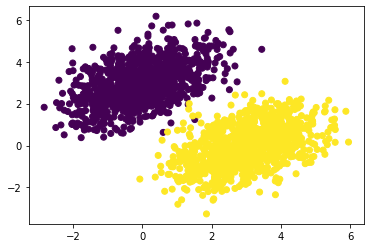

In [203]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [204]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


**The forward pass function**

In [205]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [206]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [207]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [208]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.9814
Loss at step 1: 0.3434
Loss at step 2: 0.1483
Loss at step 3: 0.1171
Loss at step 4: 0.1068
Loss at step 5: 0.0997
Loss at step 6: 0.0934
Loss at step 7: 0.0877
Loss at step 8: 0.0824
Loss at step 9: 0.0777
Loss at step 10: 0.0733
Loss at step 11: 0.0693
Loss at step 12: 0.0656
Loss at step 13: 0.0623
Loss at step 14: 0.0592
Loss at step 15: 0.0564
Loss at step 16: 0.0538
Loss at step 17: 0.0515
Loss at step 18: 0.0494
Loss at step 19: 0.0474
Loss at step 20: 0.0456
Loss at step 21: 0.0439
Loss at step 22: 0.0424
Loss at step 23: 0.0411
Loss at step 24: 0.0398
Loss at step 25: 0.0387
Loss at step 26: 0.0376
Loss at step 27: 0.0366
Loss at step 28: 0.0358
Loss at step 29: 0.0350
Loss at step 30: 0.0342
Loss at step 31: 0.0335
Loss at step 32: 0.0329
Loss at step 33: 0.0324
Loss at step 34: 0.0318
Loss at step 35: 0.0314
Loss at step 36: 0.0309
Loss at step 37: 0.0305
Loss at step 38: 0.0302
Loss at step 39: 0.0298


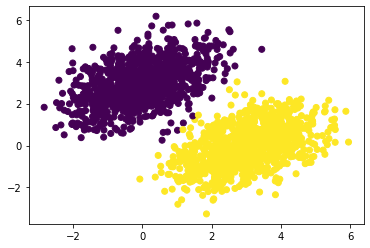

In [209]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

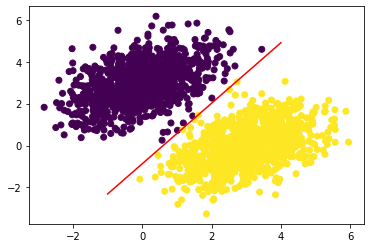

In [210]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [211]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [212]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [213]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [214]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [215]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [216]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [217]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [218]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 11.5904 - binary_accuracy: 0.1905
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 11.1983 - binary_accuracy: 0.1935
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 10.8666 - binary_accuracy: 0.1995
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 10.5509 - binary_accuracy: 0.2030
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 10.2363 - binary_accuracy: 0.2060


In [219]:
history.history

{'loss': [11.59040355682373,
  11.198339462280273,
  10.86661148071289,
  10.550858497619629,
  10.236299514770508],
 'binary_accuracy': [0.19050000607967377,
  0.19349999725818634,
  0.19949999451637268,
  0.2029999941587448,
  0.20600000023841858]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [220]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 2s 10ms/step - loss: 0.3066 - binary_accuracy: 0.9779 - val_loss: 0.3601 - val_binary_accuracy: 0.6233
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0784 - binary_accuracy: 0.9436 - val_loss: 0.0516 - val_binary_accuracy: 0.9900
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0735 - binary_accuracy: 0.9514 - val_loss: 0.0274 - val_binary_accuracy: 0.9933
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0744 - binary_accuracy: 0.9543 - val_loss: 0.1186 - val_binary_accuracy: 0.9250
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0713 - binary_accuracy: 0.9550 - val_loss: 0.0279 - val_binary_accuracy: 0.9933


In [221]:
results = model.evaluate(inputs,targets)

63/63 [==============================] - 0s 2ms/step - loss: 0.0318 - binary_accuracy: 0.9960


### Inference: Using a model after training

In [222]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.1445331 ]
 [ 0.9563131 ]
 [ 0.8853017 ]
 [ 0.73127615]
 [ 0.82186115]
 [ 0.9830429 ]
 [ 1.1163083 ]
 [ 1.0916888 ]
 [ 0.66915524]
 [-0.13087058]]


## Summary

In [223]:
#soft改成sigmoid
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="sigmoid")
])

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])


In [224]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 11.4811 - binary_accuracy: 0.6160
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 10.9879 - binary_accuracy: 0.6195
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 10.5692 - binary_accuracy: 0.6245
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 10.1651 - binary_accuracy: 0.6275
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 9.7791 - binary_accuracy: 0.6325


In [225]:
history.history

{'loss': [11.481062889099121,
  10.987945556640625,
  10.569210052490234,
  10.165144920349121,
  9.779069900512695],
 'binary_accuracy': [0.6159999966621399,
  0.6194999814033508,
  0.6244999766349792,
  0.6274999976158142,
  0.6324999928474426]}

In [226]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1130 - binary_accuracy: 0.9579 - val_loss: 0.0337 - val_binary_accuracy: 0.9933
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0728 - binary_accuracy: 0.9500 - val_loss: 0.1031 - val_binary_accuracy: 0.9083
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0679 - binary_accuracy: 0.9636 - val_loss: 0.0269 - val_binary_accuracy: 0.9950
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0712 - binary_accuracy: 0.9600 - val_loss: 0.0945 - val_binary_accuracy: 0.9733
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0718 - binary_accuracy: 0.9600 - val_loss: 0.0500 - val_binary_accuracy: 0.9933


In [227]:

results = model.evaluate(inputs,targets)

63/63 [==============================] - 0s 1ms/step - loss: 0.0477 - binary_accuracy: 0.9965


In [228]:
#accuracy稍微提高了

In [229]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.02225912]
 [ 1.1400692 ]
 [ 0.01298213]
 [-0.11094499]
 [-0.16380775]
 [ 1.2964065 ]
 [ 0.44998145]
 [ 0.12352046]
 [ 0.172344  ]
 [ 0.18742058]]


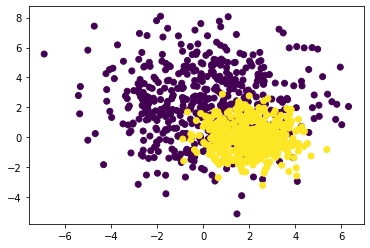

In [230]:
num_samples_per_class = 500
negative_samples = np.random.multivariate_normal(
    mean=[0, 2],
    cov=[[5,0],[0,5]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[2, 0],
    cov=[[1, 0],[0, 1]],
    size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Loss at step 0: 3.2846
Loss at step 1: 0.4091
Loss at step 2: 0.2910
Loss at step 3: 0.2599
Loss at step 4: 0.2379
Loss at step 5: 0.2203
Loss at step 6: 0.2061
Loss at step 7: 0.1948
Loss at step 8: 0.1857
Loss at step 9: 0.1783
Loss at step 10: 0.1724
Loss at step 11: 0.1677
Loss at step 12: 0.1638
Loss at step 13: 0.1608
Loss at step 14: 0.1583
Loss at step 15: 0.1563
Loss at step 16: 0.1547
Loss at step 17: 0.1534
Loss at step 18: 0.1524
Loss at step 19: 0.1516
Loss at step 20: 0.1509
Loss at step 21: 0.1504
Loss at step 22: 0.1499
Loss at step 23: 0.1496
Loss at step 24: 0.1493
Loss at step 25: 0.1491
Loss at step 26: 0.1489
Loss at step 27: 0.1488
Loss at step 28: 0.1486
Loss at step 29: 0.1485
Loss at step 30: 0.1485
Loss at step 31: 0.1484
Loss at step 32: 0.1484
Loss at step 33: 0.1483
Loss at step 34: 0.1483
Loss at step 35: 0.1483
Loss at step 36: 0.1482
Loss at step 37: 0.1482
Loss at step 38: 0.1482
Loss at step 39: 0.1482


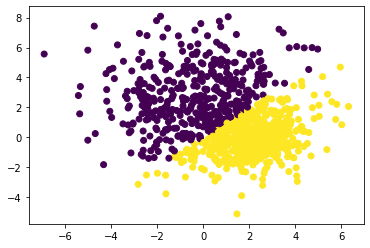

In [231]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

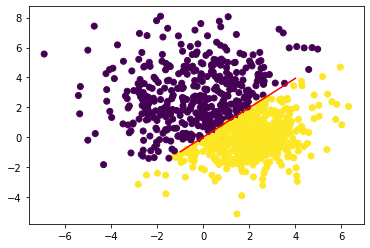

In [232]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)